<a href="https://colab.research.google.com/github/amoghavarsha96/Virtual-Coding-Competition/blob/main/exitTest2_AmoghaVarsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip '/content/drive/MyDrive/rsna-pneumonia-detection-challenge.zip' -d  '/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip'

In [ ]:
ls

drive/  sample_data/


In [ ]:
! pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg pydicom python-gdcm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 92.9 MB/s eta 0:00:00


In [ ]:
! pip install --upgrade pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import gc
import glob
import os
import cv2
import pydicom
import warnings
warnings.simplefilter(action = 'ignore')

In [ ]:
data_detailed_class_info=pd.read_csv('/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_detailed_class_info.csv')

In [ ]:
data_detailed_class_info.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
data_sample_submission=pd.read_csv('/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_sample_submission.csv')

In [ ]:
data_sample_submission.head()

patientId PredictionString
0  0000a175-0e68-4ca4-b1af-167204a7e0bc  0.5 0 0 100 100
1  0005d3cc-3c3f-40b9-93c3-46231c3eb813  0.5 0 0 100 100
2  000686d7-f4fc-448d-97a0-44fa9c5d3aa6  0.5 0 0 100 100
3  000e3a7d-c0ca-4349-bb26-5af2d8993c3d  0.5 0 0 100 100
4  00100a24-854d-423d-a092-edcf6179e061  0.5 0 0 100 100

In [ ]:
# Load DICOM images and labels 
image_dir = "/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images" 
label_file = "/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_labels.csv"    

**Exploring the given Data files, classes and images of different classes**

In [ ]:
Train_labels = pd.read_csv('/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_labels.csv')
Train_labels.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
train_labels = Train_labels.groupby('Target').size()
train_labels

Target
0    20672
1     9555
dtype: int64

In [ ]:
Train_labels.shape

(30227, 6)

<Axes: xlabel='Target'>

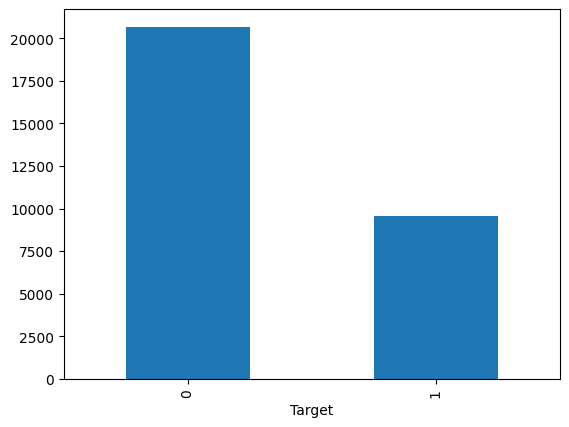

In [ ]:
train_labels.plot.bar()

In [ ]:
Train_labels.fillna(0.0)

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2      00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    0.0    0.0    0.0     0.0   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    0.0    0.0    0.0     0.0   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
30222       1  
30223       0  
30224       0  
30225       1  
30226       1  

[30227 rows x 6 columns]

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_labels.csv')
sample.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
class_info = pd.read_csv('/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_detailed_class_info.csv')
class_info.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
class_info.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
Class_info = class_info.groupby('class').size()
Class_info

class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

In [ ]:
df = pd.concat([Train_labels,class_info["class"]],axis=1,sort=False)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df.shape

(30227, 7)

In [ ]:
df.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

**Distribution of classes**

In [ ]:
df.groupby('class').size()

class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

<Axes: ylabel='class'>

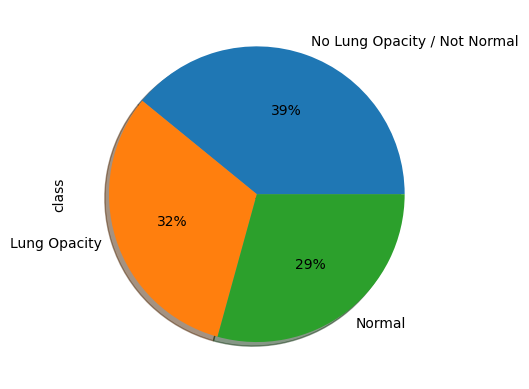

In [ ]:
df["class"].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True, subplots=False)

In [ ]:
pd.pivot_table(df,index=["Target"], aggfunc='count')

class  height  patientId  width     x     y
Target                                             
0       20672       0      20672      0     0     0
1        9555    9555       9555   9555  9555  9555

<Axes: xlabel='class', ylabel='count'>

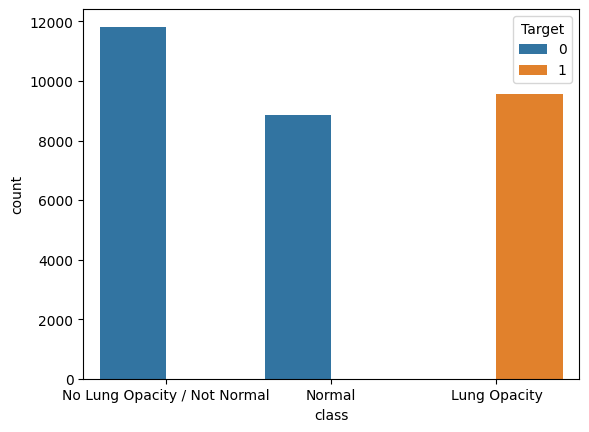

In [ ]:
sns.countplot(x = 'class', hue = 'Target', data = df)

**Correlation between the variables There is a strong Correlation between height and width variables**

In [ ]:
df.corr()

x         y     width    height  Target
x       1.000000  0.007604 -0.058665  0.008256     NaN
y       0.007604  1.000000 -0.299897 -0.645369     NaN
width  -0.058665 -0.299897  1.000000  0.597461     NaN
height  0.008256 -0.645369  0.597461  1.000000     NaN
Target       NaN       NaN       NaN       NaN     1.0

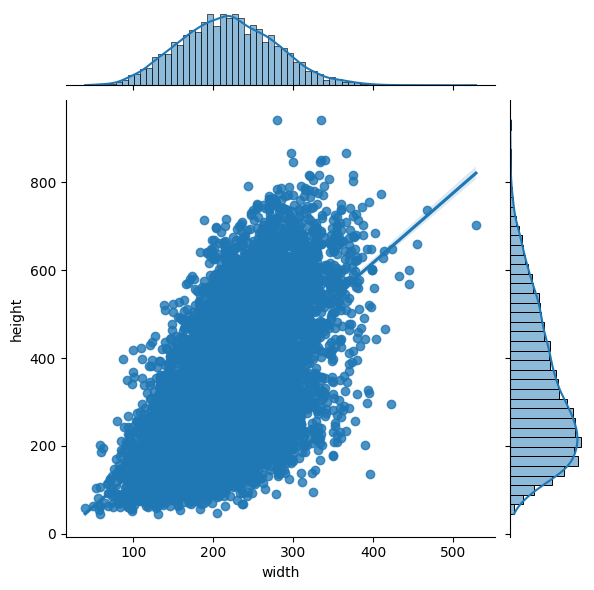

In [ ]:
sns.jointplot(x = 'width', y = 'height', data = df, kind="reg")

**EDA with the header values from the dataframe**

In [ ]:
import pydicom
patientId = Train_labels['patientId'][0]
dcm_file = '/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images/%s.dcm'% patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
dicom_df=df
dicom_df.shape

(30227, 7)

In [ ]:
from tqdm import tqdm
def process_dicom_data(data_df):
    for n, pid in tqdm(enumerate(data_df['patientId'].unique())):        
        dcm_file = '/content/drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images/%s.dcm' % pid
        dcm_data = pydicom.read_file(dcm_file)        
        idx = (data_df['patientId']==dcm_data.PatientID)
        data_df.loc[idx,'Modality'] = dcm_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = dcm_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
        
    return data_df

In [ ]:
dicom_df = process_dicom_data(dicom_df)

26684it [46:18,  9.60it/s]


In [ ]:
dicom_df = dicom_df.astype({"PatientAge": int})
dicom_df.fillna(0.0, inplace=True)
dicom_df.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class Modality  PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR          51          F   
1  No Lung Opacity / Not Normal       CR          48          F   
2  No Lung Opacity / Not Normal       CR          19          M   
3                        Normal       CR          28          M   
4                  Lung Opacity       CR          32          F   

  BodyPartExamined ViewPosition  
0            CHEST           PA  
1            CHEST           PA  
2            CHEST           AP  
3            CHEST           PA  
4            CHEST           AP

In [ ]:
dicom_df.nunique()

patientId           26684
x                     749
y                     727
width                 352
height                726
Target                  2
class                   3
Modality                1
PatientAge             97
PatientSex              2
BodyPartExamined        1
ViewPosition            2
dtype: int64

**Now Visualizing the data along with their dicom header values**

<Axes: xlabel='PatientAge', ylabel='count'>

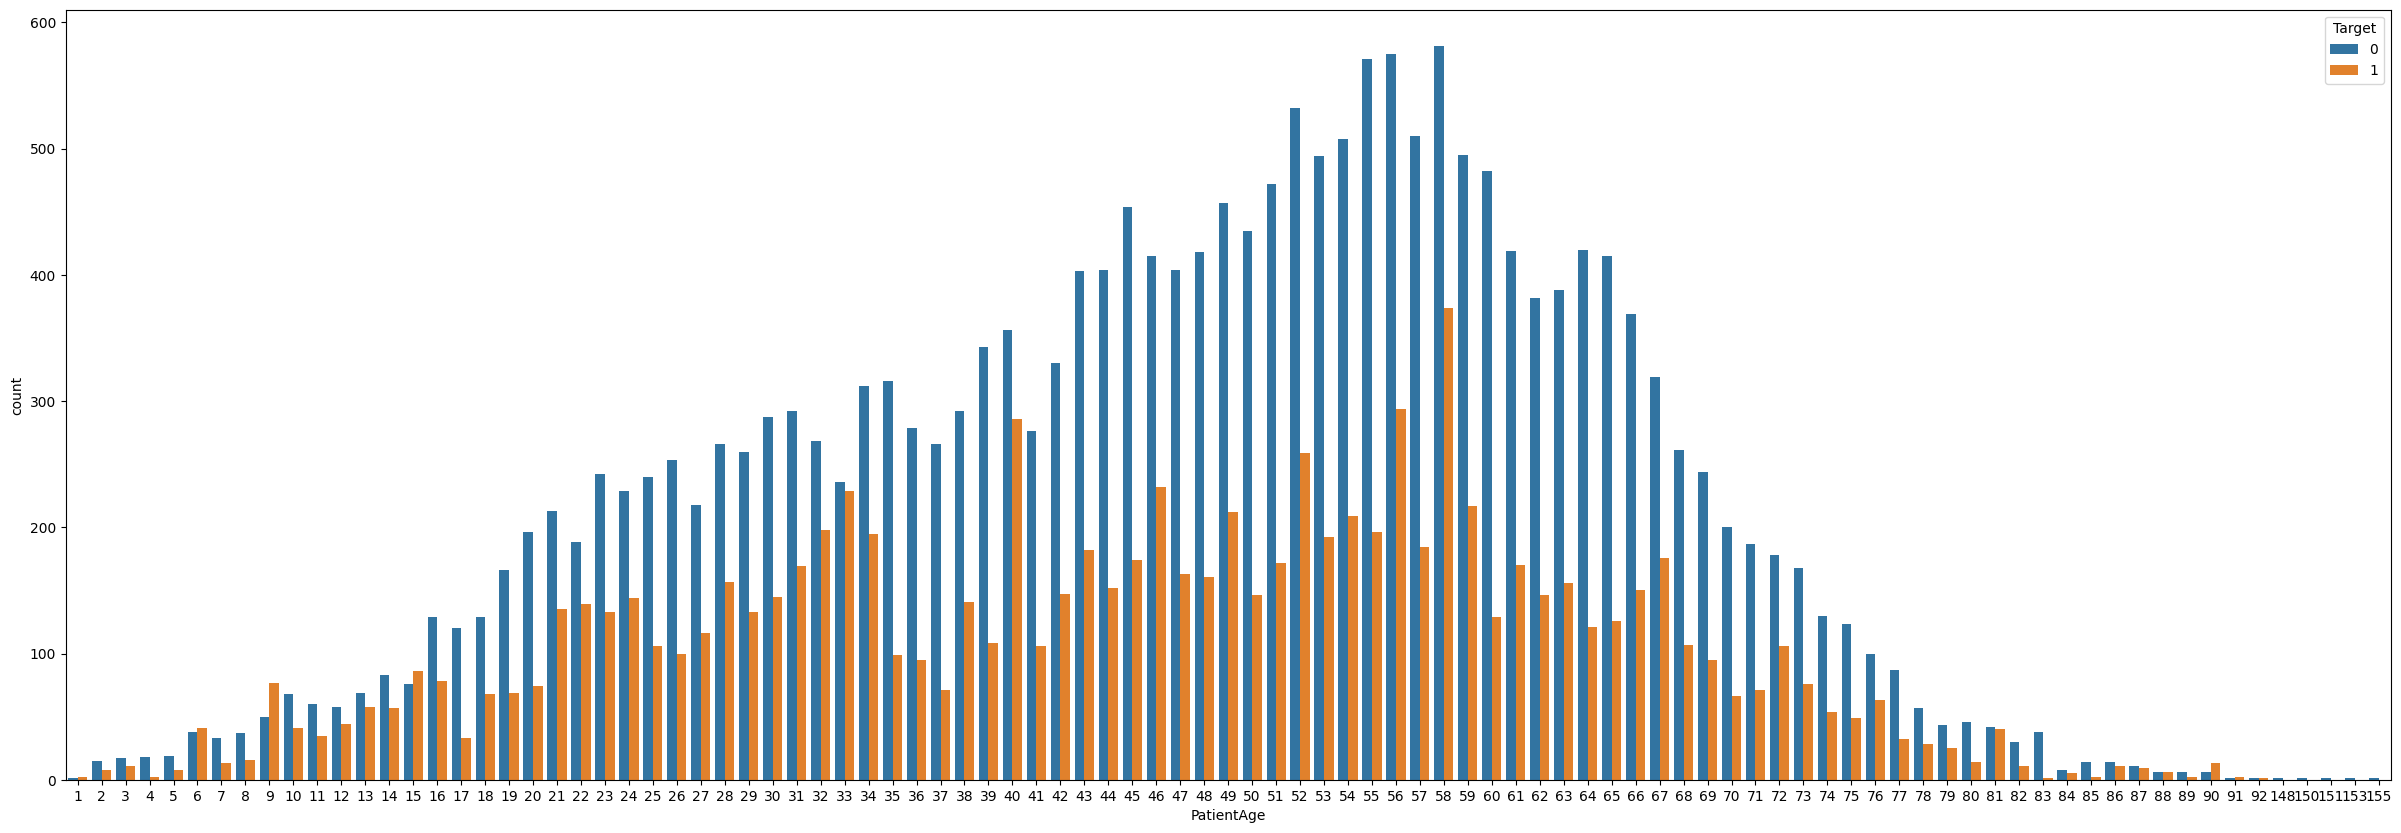

In [ ]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'PatientAge', hue = 'Target', data = dicom_df)

<Axes: xlabel='PatientSex', ylabel='count'>

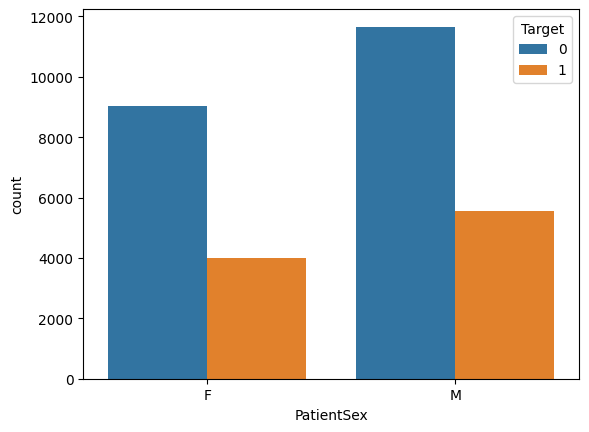

In [ ]:
sns.countplot(x = 'PatientSex', hue = 'Target', data = dicom_df)

<Axes: xlabel='ViewPosition', ylabel='count'>

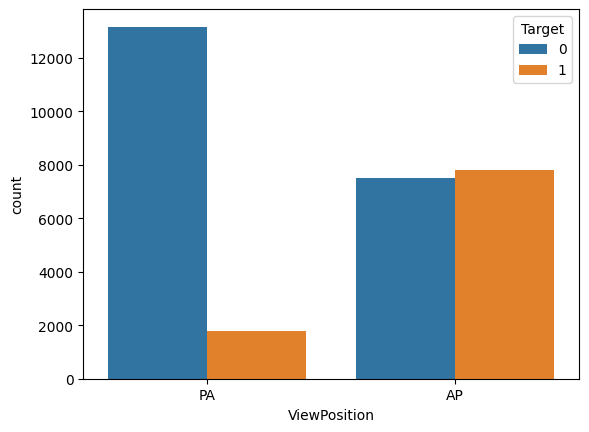

In [ ]:
sns.countplot(x = 'ViewPosition', hue = 'Target', data = dicom_df)

In [ ]:
dicom_df = dicom_df.drop('Target', axis=1)

In [ ]:
dicom_df['PatientSex'].astype('category')
dicom_df['ViewPosition'].astype('category')
dicom_df['PatientSex'] = np.where(dicom_df["PatientSex"].str.contains("M"), 1, 0)
dicom_df['ViewPosition'] = np.where(dicom_df["ViewPosition"].str.contains("AP"), 1, 0)

In [ ]:
dicom_df.head()

patientId      x      y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   

                          class Modality  PatientAge  PatientSex  \
0  No Lung Opacity / Not Normal       CR          51           0   
1  No Lung Opacity / Not Normal       CR          48           0   
2  No Lung Opacity / Not Normal       CR          19           1   
3                        Normal       CR          28           1   
4                  Lung Opacity       CR          32           0   

  BodyPartExamined  ViewPosition  
0            CHEST             0  
1            CHEST             0  
2            CHEST             1  
3            CHEST             0  
4            CHEST             1

In [ ]:
dicom_df.corr()

x         y     width    height  PatientAge  PatientSex  \
x             1.000000  0.762055  0.795007  0.735061   -0.053137    0.009206   
y             0.762055  1.000000  0.811707  0.634177   -0.024397    0.028091   
width         0.795007  0.811707  1.000000  0.915537   -0.049035    0.037665   
height        0.735061  0.634177  0.915537  1.000000   -0.050976    0.029863   
PatientAge   -0.053137 -0.024397 -0.049035 -0.050976    1.000000   -0.009842   
PatientSex    0.009206  0.028091  0.037665  0.029863   -0.009842    1.000000   
ViewPosition  0.361044  0.353190  0.411144  0.423878   -0.060333    0.016904   

              ViewPosition  
x                 0.361044  
y                 0.353190  
width             0.411144  
height            0.423878  
PatientAge       -0.060333  
PatientSex        0.016904  
ViewPosition      1.000000

Apart from the correlation between the width and height,there is no strong correlation between the other variables in the dataframe

**Visualizing the dicom images**

In [ ]:
def show_dicom_image(data_df):
        img_data = list(data_df.T.to_dict().values())
        f, ax = plt.subplots(2,2, figsize=(16,18))
        for i,data_row in enumerate(img_data):
            pid = data_row['patientId']
            dcm_file = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images/%s.dcm' % pid
            dcm_data = pydicom.read_file(dcm_file)                    
            ax[i//2, i%2].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
            ax[i//2, i%2].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))

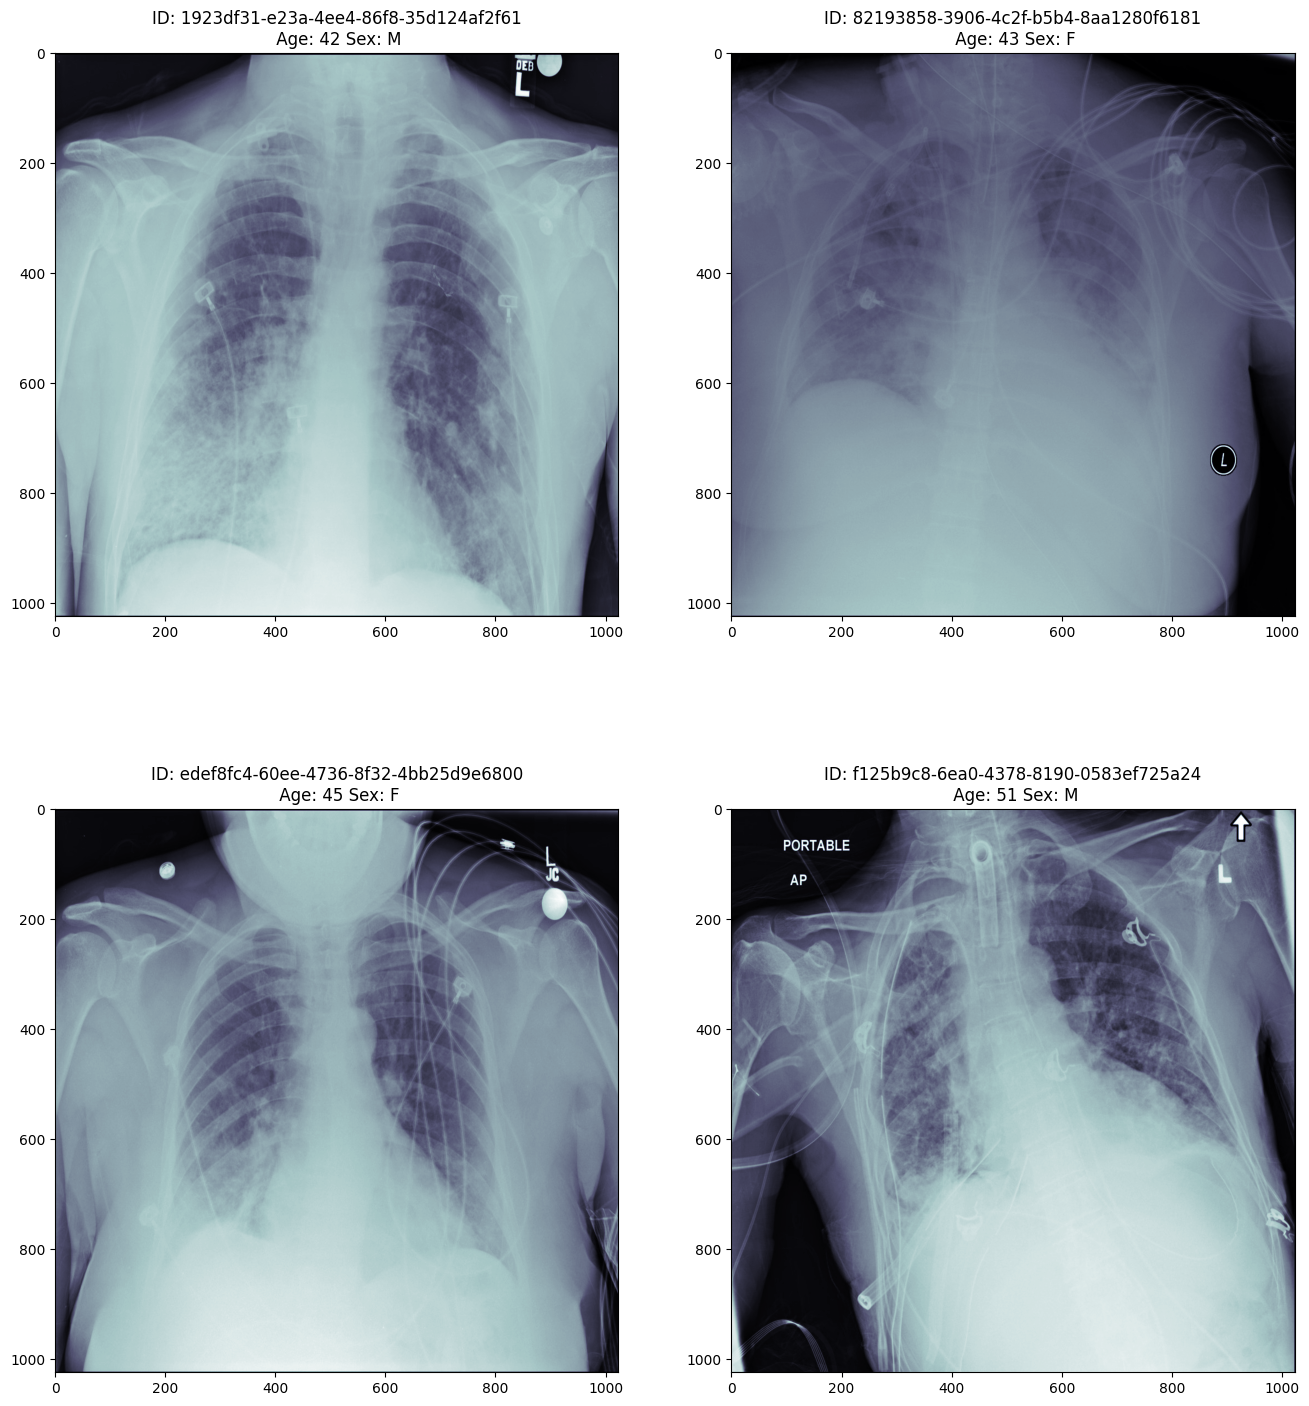

In [ ]:
show_dicom_image(df[df['Target']==1].sample(n=4))

**Showing some random dicom images of a patient who do not have Pnuemonia, however with class No Lung Opacity / Not Normal**

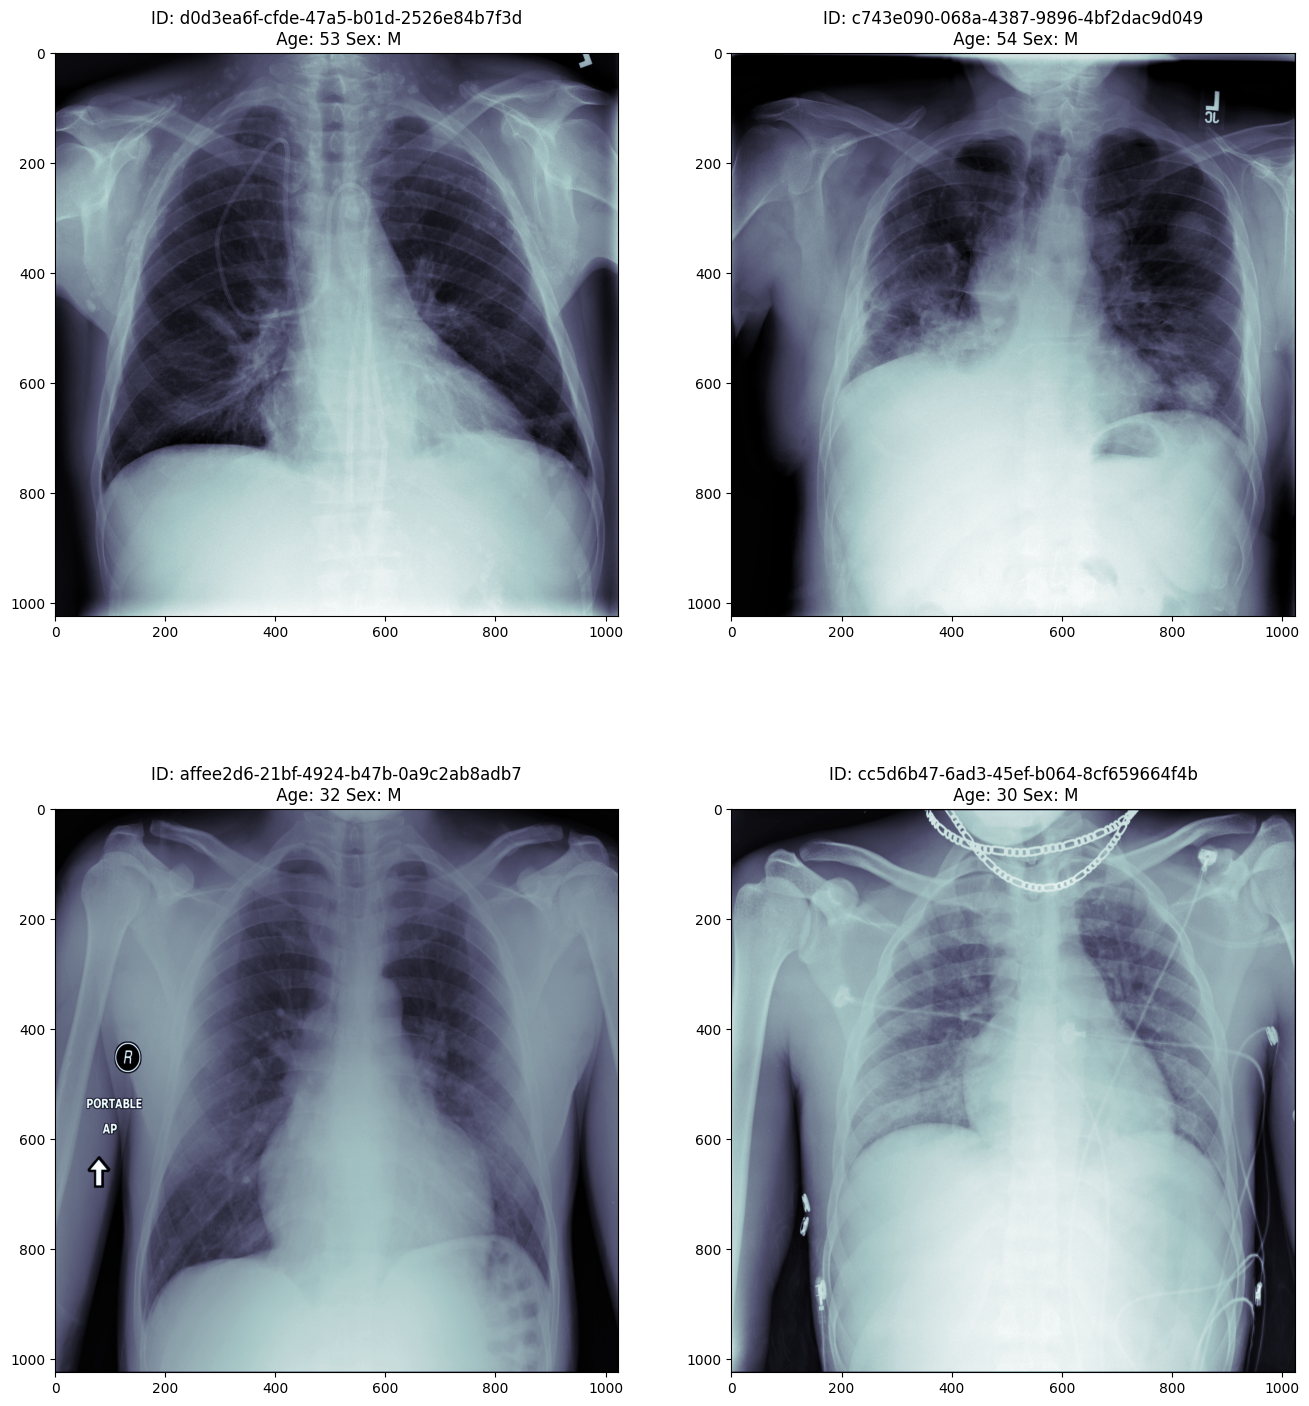

In [ ]:
show_dicom_image(df[ (df['Target']==0) & (df['class']=='No Lung Opacity / Not Normal')].sample(n=4))

**Showing some random dicom images of a patients who do not have Pnuemonia, however with class Normal**

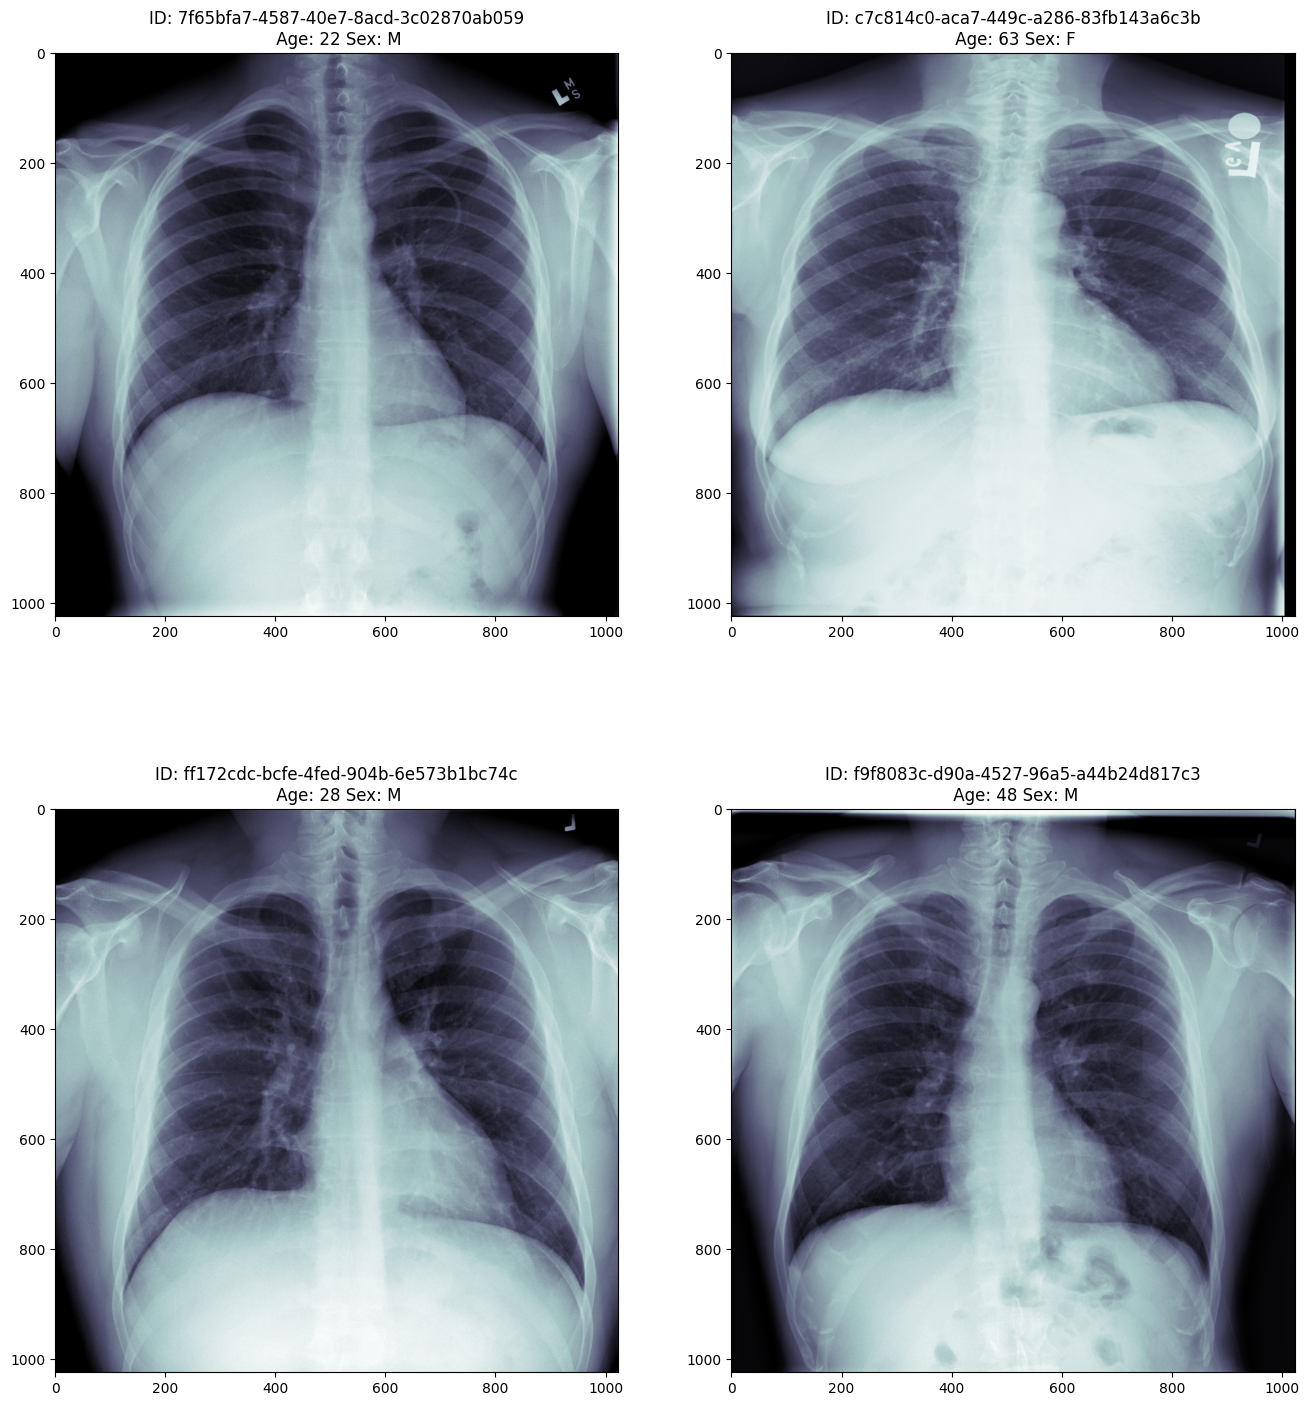

In [ ]:
show_dicom_image(df[ (df['Target']==0) & (df['class']=='Normal')].sample(n=4))

**Now displaying images with bounding boxes**

In [ ]:
def show_dicome_with_boundingbox(data_df):
    img_data = list(data_df.T.to_dict().values())
    f, ax = plt.subplots(2,2, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        pid = data_row['patientId']
        dcm_file = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images/%s.dcm' % pid
        dcm_data = pydicom.read_file(dcm_file)                    
        ax[i//2, i%2].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
        ax[i//2, i%2].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))
        rows = data_df[data_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())        
        for j, row in enumerate(box_data):            
            x,y,width,height = row['x'], row['y'],row['width'],row['height']
            rectangle = Rectangle(xy=(x,y),width=width, height=height, color="red",alpha = 0.1)
            ax[i//2, i%2].add_patch(rectangle) 

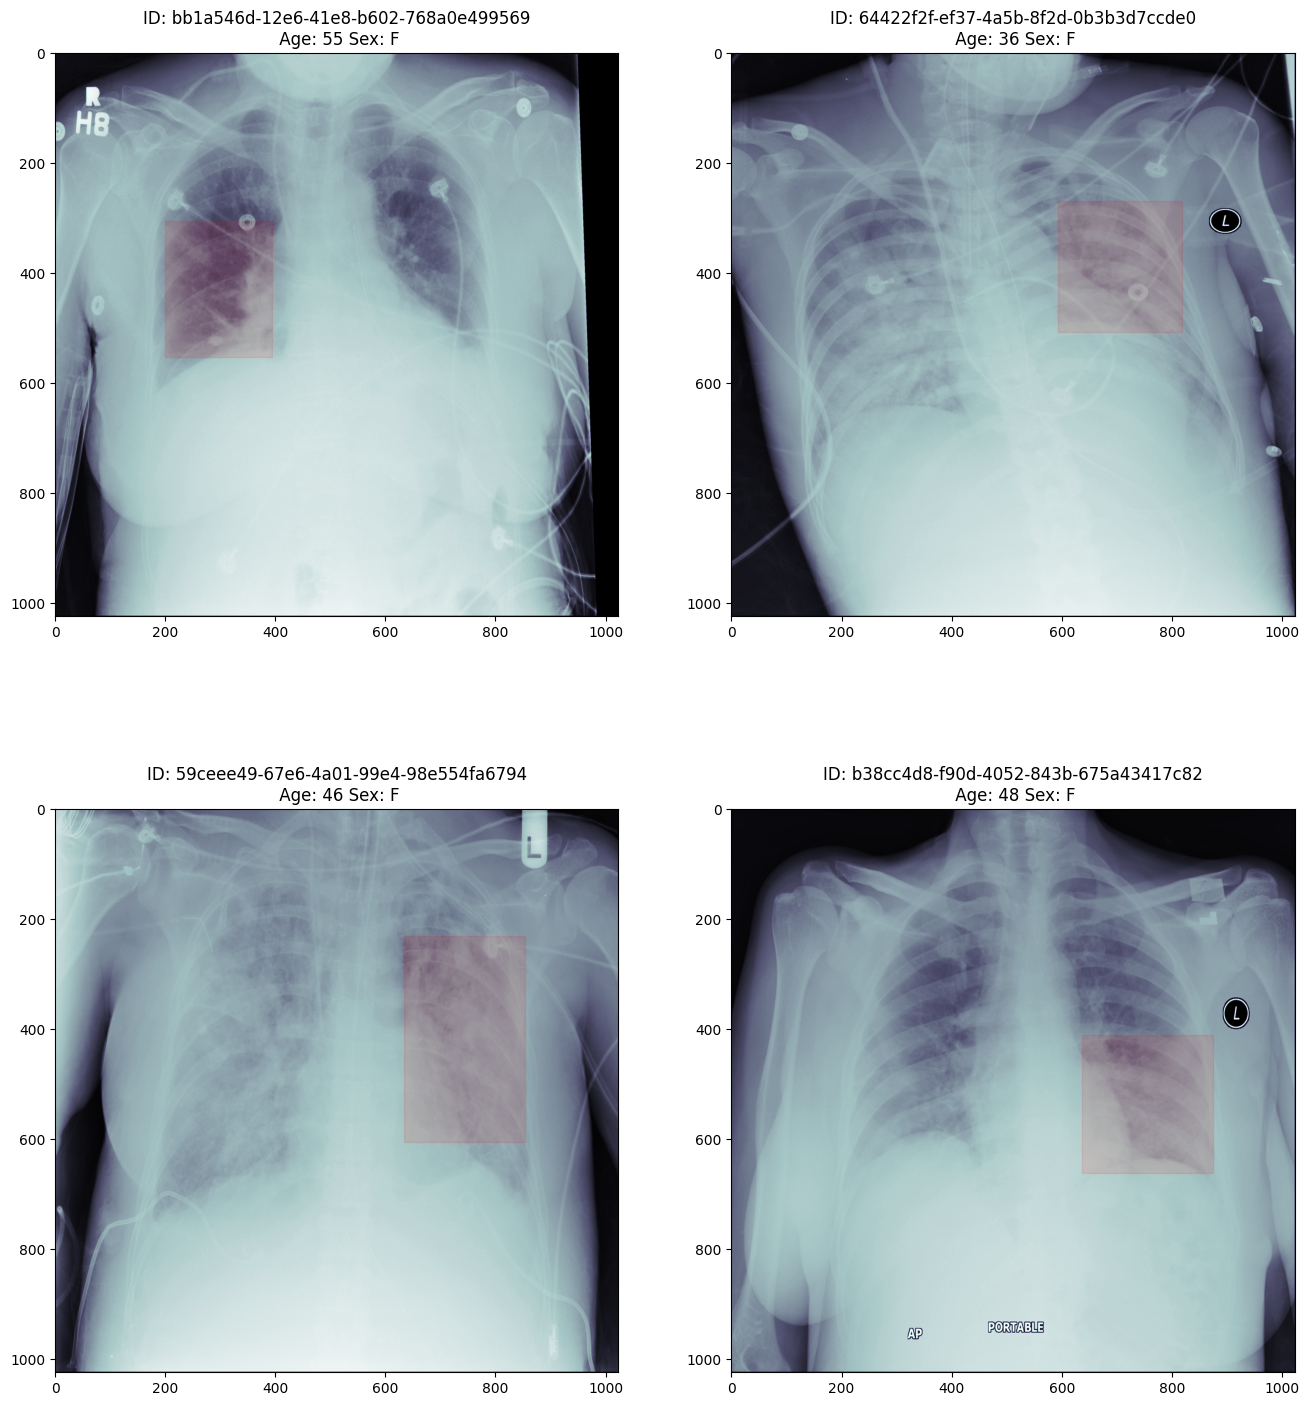

In [ ]:
show_dicome_with_boundingbox(df[df['Target']==1].sample(n=4))

**Model Building**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg pydicom python-gdcm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 76.0 MB/s eta 0:00:00


In [4]:
! pip install --upgrade pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow import keras

In [6]:
pneumonia_locations = {}
# load table
with open(os.path.join('drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

**Load image filenames**

In [8]:
# load and shuffle filenames
folder = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000


**Data generator**

The dataset is too large to fit into memory, so we need to create a generator that loads data on the fly. The generator takes in some filenames, batch_size and other parameters. The generator outputs a random batch of numpy images and numpy masks.

In [9]:
class generator(keras.utils.Sequence):    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [10]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
   
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [11]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [12]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
EPOCHS=2
MULTI_PROCESSING = True 

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)

<ipython-input-13-3a49034bb2c0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)


Epoch 1/2
 29/145 [=====>........................] - ETA: 2:40:08 - loss: 0.5932 - accuracy: 0.9377 - mean_iou: 0.5516

**Plot Accuracy / Loss**

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

**Predict test images**

In [ ]:
i=0
for imgs, msks in valid_gen:    
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        i=i+1
        #exit after 32 images
        if i>32:
            break
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break


In [ ]:
folder = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=100, image_size=128, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in tqdm(test_gen):
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission_1.csv')

In [ ]:
# load and shuffle filenames
#folder = '../input/stage_2_test_images'
#test_filenames = os.listdir(folder)
#print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True

folder = 'drive/MyDrive/ICT/rsna-pneumonia-detection-challenge.zip/stage_2_test_images'
#train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=True, predict=False)
#test_gen = generator(folder, valid_filenames, None, batch_size=32, image_size=IMAGE_SIZE, shuffle=False, predict=True)
test_gen = generator(folder, test_filenames, None, batch_size=32, image_size=128, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
       # print(filename)
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break
        
print("Done predicting...")
        
# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission_1.csv')